In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings("ignore")

##### **Background on the data**

Data meanings:

- `VendorID`:   A code indicating the LPEP provider that provided
                the record.
                1 = Creative Mobile Technologies, LLC.
                2 = VeriFone Inc.
- `lpep_pickup_datetime`: The date and time when the meter was engaged.
- `lpep_dropoff_datetime`: The date and time when the meter was disengaged.
- `Passenger_count`:    The number of passengers in the vehicle.
                        This is a driver-entered value.
- `Trip_distance`: The elapsed trip distance in miles was reported by the taximeter.
- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged.
- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.
- `RateCodeID`: The final rate code is in effect at the end of the trip.
                1 = Standard rate
                2 =JFK
                3 =Newark
                4 =Nassau or Westchester
                5 =Negotiated fare
                6 =Group ride
- `Store_and_fwd_flag`: This flag indicates whether the trip record was held
                        in the vehicle memory before sending to the vendor,
                        aka “store and forward,” because the vehicle did
                        not have a connection to the server.
                        Y = store and forward trip
                        N = not a store and forward trip
- `Payment_type`:   A numeric code signifying how the passenger paid for the trip.
                    1 = Credit card
                    2 = Cash
                    3 = No charge
                    4 = Dispute
                    5 = Unknown
                    6 = Voided trip
- `Fare_amount`:The time-and-distance fare is calculated by the meter. 
                Extra Miscellaneous extras and surcharges.
                Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- `MTA_tax`:$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- `Improvement_surcharge`:  $0.30 improvement surcharge assessed on hailed trips at the flag drop. 
                            The improvement surcharge began being levied in 2015.
- `Tip_amount`:This field is automatically populated for credit card tips. Cash tips are not included.
- `Tolls_amount`:The total amount of all tolls paid in the trip.
- `Total_amount`:The total amount charged to passengers. Does not include cash tips.
- `Trip_type`:  A code indicating whether the trip was a street hail
                or a dispatch that is automatically assigned based
                on the metered rate in use but can be altered by the
                driver.
                1 = Street-hail
                2 = Dispatch

## Load Dataset

In [7]:
df=pd.read_csv(r'H:\Capstone2\data\raw\NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding And Cleaning

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [ ]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (68211, 20)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,VendorID,int64,0.000000,False,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000000,False,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000000,False,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339154,False,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339154,False,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000000,False,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000000,False,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339154,False,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000000,False,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000000,True,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


<Axes: >

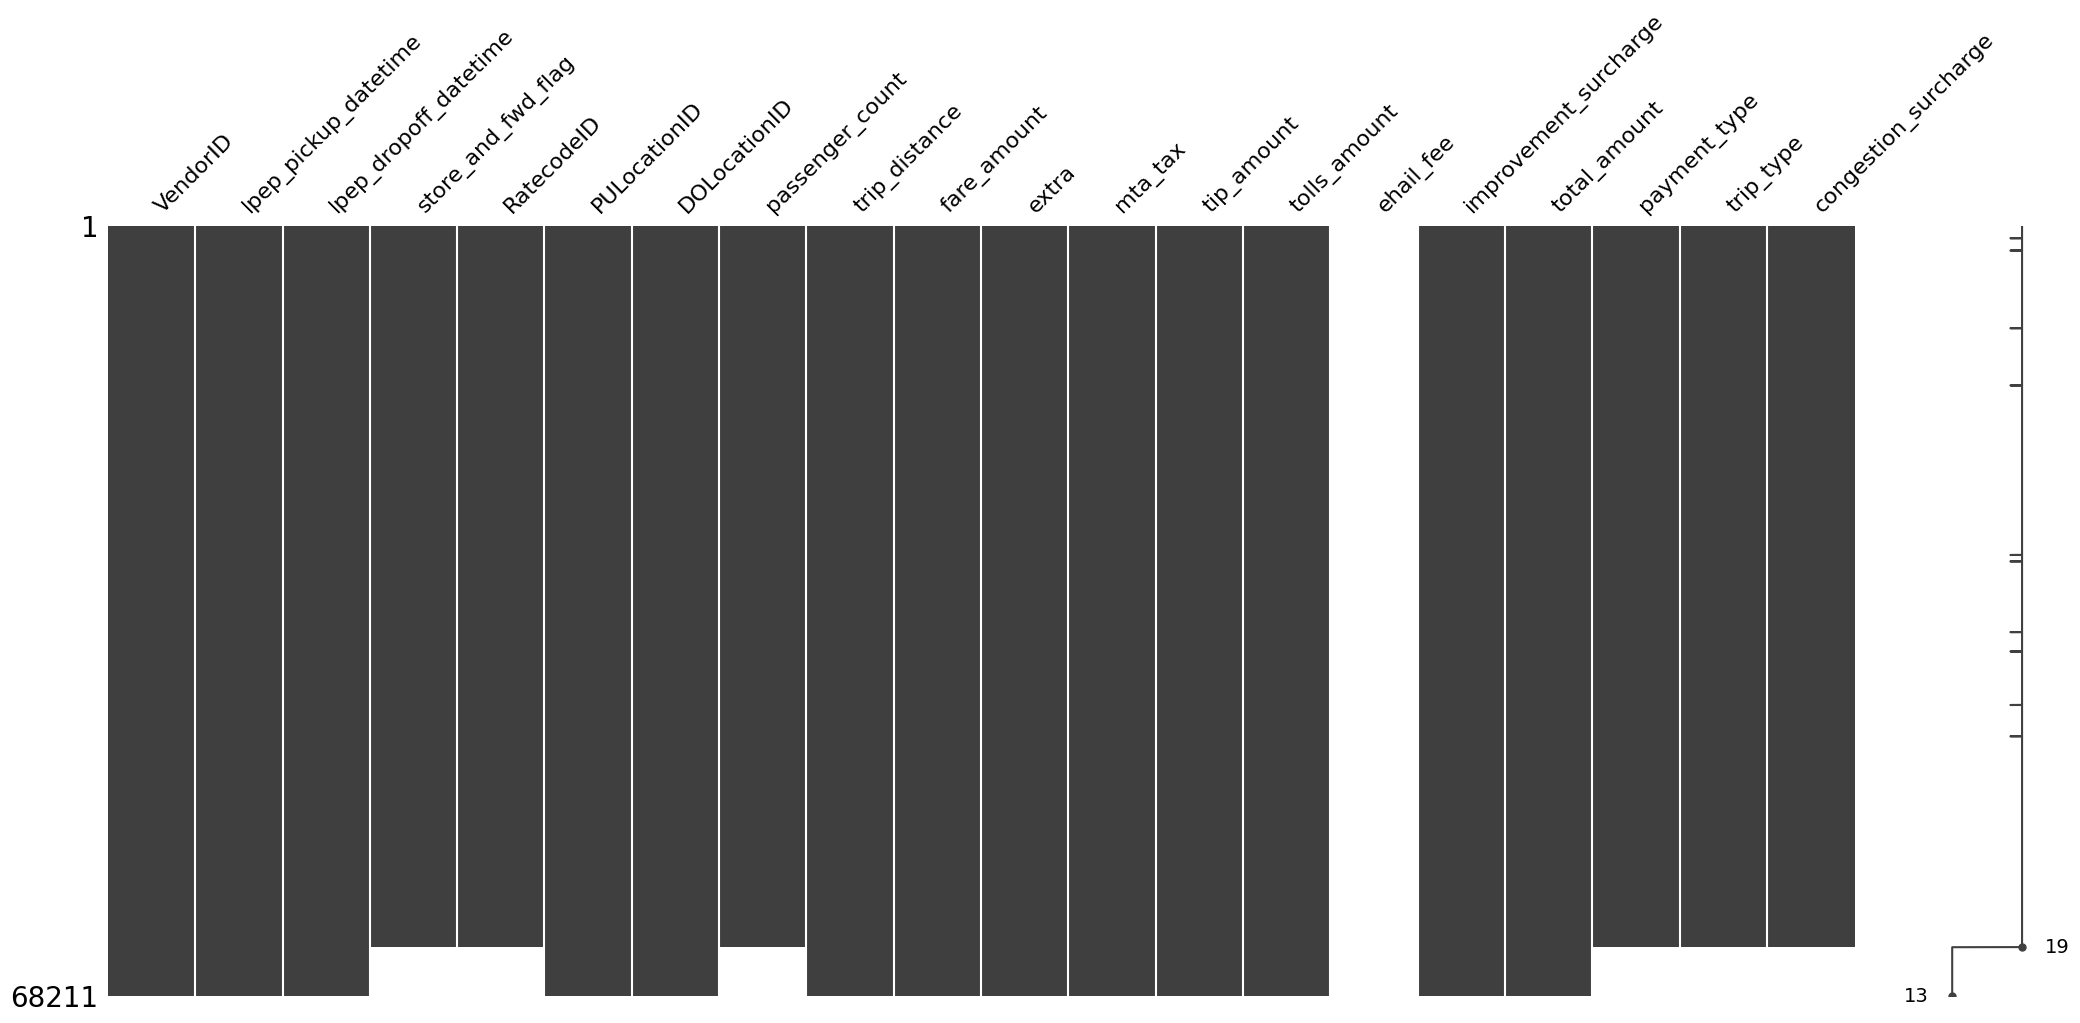

In [ ]:
msn.matrix(df)

### Columns Ehailing

- Columns Ehailing merupakan columns ongkos aplikasi untuk kendaraan pribadi yang digunakan untuk transportasi umum.
  Berdasarkan penjelasan diatas, saya menyimpulkan bahwa kendaraan yang digunakan adalah kendaraan milik perusahaan taxi. Sehingga Columns Ehaling fee tidak diperlukan untuk analisis data 

In [ ]:
# Drop Columns Ehail Fee
df.drop(['ehail_fee'], axis=1, inplace= True)

### Columns store_and_fwd_flag
Columns ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Columns ini tidak diperlukan dalam analisis data

In [ ]:
df.drop(['store_and_fwd_flag'], axis=1, inplace= True)

### Drop Rows yang memiliki nan Value
ada 6.33% missing value yang akan di drop. Data yang dimiliki sudah lebih dari cukup untuk merepresentasikan data

In [ ]:
df.dropna(axis = 0 , how = 'any', inplace = True)

### Drop Columns yang memiliki Trip Distance 1571.97
karena waktu perjalanan dan jarak tidak masuk akal

In [ ]:
df = df[df.trip_distance != 1571.97]

### Drop Row yang Memiliki PULocationID dan DOLocationID = 264, 265
karena menampilkan lokasi unknown 

In [ ]:
df = df[df.DOLocationID != 265]
df = df[df.DOLocationID != 264]
df = df[df.PULocationID != 265]
df = df[df.PULocationID != 264]

### Menggati data type

mengganti data type pada columns lpep_pickup_datetime dan lpep_dropoff_datetime dari object menjadi datetime

In [ ]:
df["RatecodeID"] = df["RatecodeID"].astype('Int64')
df["passenger_count"] = df["passenger_count"].astype('Int64')
df["payment_type"] = df["payment_type"].astype('Int64')
df["trip_type"] = df["trip_type"].astype('Int64')
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

### Mengganti Neg Value
mengganti neg value dan menjumlahkannya ulang untuk mendapatkan total amount baru

In [ ]:
df[["fare_amount", "extra", "mta_tax", "tip_amount", "total_amount", "improvement_surcharge", "congestion_surcharge"]] = df[["fare_amount", "extra", "mta_tax", "tip_amount", "total_amount", "improvement_surcharge", "congestion_surcharge"]].abs()

# Update kolom "total_amount"

df.drop(columns="total_amount", inplace=True)
df.insert(15, "total_amount", df["fare_amount"] + df["extra"] + df["mta_tax"] + df["tip_amount"] + df["tolls_amount"] + df["improvement_surcharge"] + df["congestion_surcharge"])

### Mengganti Nama Columns

In [ ]:
df = df.rename(
    columns={
        'lpep_pickup_datetime': 'Pickup_Time', 
        'lpep_dropoff_datetime': 'Dropoff_Time'
    }
)
df.columns

Index(['VendorID', 'Pickup_Time', 'Dropoff_Time', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'payment_type', 'total_amount', 'trip_type',
       'congestion_surcharge'],
      dtype='object')

### Mengganti Payment Type
mengganti row yang memiliki 'trip_distance'== 0 and 'fare_amount' == 0 and 'total_amount' == 0 and 'payment_type' == 1
menjadi payment_type == 6 dengan asumsi penumpang membatalkan pesanan 

In [ ]:
for i in df.index:
    if df['trip_distance'][i] == 0 and df['fare_amount'][i] == 0 and df['total_amount'][i] == 0 and df['payment_type'][i] == 1:
        df['payment_type'][i] = 6

### Columns jam 

In [ ]:
df['pickup_hour'] = pd.DatetimeIndex(df['Pickup_Time']).hour
df['dropoff_hour'] = pd.DatetimeIndex(df['Dropoff_Time']).hour
df["pickup_hour"] = df["pickup_hour"].astype('Int64')
df["dropoff_hour"] = df["dropoff_hour"].astype('Int64')

### Columns Waktu Perjalanan 

In [ ]:
df = df.assign(
    Waktu_Perjalanan = lambda x: x.Dropoff_Time - x.Pickup_Time	
)
df.head()

,VendorID,Pickup_Time,Dropoff_Time,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,payment_type,total_amount,trip_type,congestion_surcharge,pickup_hour,dropoff_hour,Waktu_Perjalanan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,...,4.03,0.0,1.0,1,24.18,1,2.75,0,0,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,1.0,...,2.64,0.0,1.0,1,15.84,1,0.00,0,0,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.0,...,1.94,0.0,1.0,1,11.64,1,0.00,0,0,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,0.5,...,1.70,0.0,1.0,1,11.20,1,0.00,0,0,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.5,...,0.00,0.0,1.0,1,9.00,1,0.00,0,0,0 days 00:05:58


In [ ]:
pd.set_option("display.max_columns", 25)
display(df)

,VendorID,Pickup_Time,Dropoff_Time,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,payment_type,total_amount,trip_type,congestion_surcharge,pickup_hour,dropoff_hour,Waktu_Perjalanan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,1,24.18,1,2.75,0,0,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,1,15.84,1,0.00,0,0,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,1,11.64,1,0.00,0,0,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,1,11.20,1,0.00,0,0,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,1,9.00,1,0.00,0,0,0 days 00:05:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,1,17.30,2,0.00,23,23,0 days 00:07:59
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,1,19.20,1,0.00,23,23,0 days 00:10:45
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,1,14.16,1,0.00,23,23,0 days 00:06:01
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,1,22.50,1,2.75,23,23,0 days 00:09:32


### Duplicated Data
Tidak Terdapat data Duplicate

In [ ]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (63185, 21)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,VendorID,int64,0.0,False,2,"[2, 1]"
1,Pickup_Time,datetime64[ns],0.0,False,62004,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,Dropoff_Time,datetime64[ns],0.0,False,61935,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,RatecodeID,Int64,0.0,False,5,"[1, 5, 3, 2, 4]"
4,PULocationID,int64,0.0,False,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
5,DOLocationID,int64,0.0,False,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
6,passenger_count,Int64,0.0,False,10,"[1, 2, 4, 3, 6, 5, 0, 8, 7, 9]"
7,trip_distance,float64,0.0,False,1655,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
8,fare_amount,float64,0.0,False,398,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."
9,extra,float64,0.0,False,12,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63185 entries, 0 to 63886
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               63185 non-null  int64          
 1   Pickup_Time            63185 non-null  datetime64[ns] 
 2   Dropoff_Time           63185 non-null  datetime64[ns] 
 3   RatecodeID             63185 non-null  Int64          
 4   PULocationID           63185 non-null  int64          
 5   DOLocationID           63185 non-null  int64          
 6   passenger_count        63185 non-null  Int64          
 7   trip_distance          63185 non-null  float64        
 8   fare_amount            63185 non-null  float64        
 9   extra                  63185 non-null  float64        
 10  mta_tax                63185 non-null  float64        
 11  tip_amount             63185 non-null  float64        
 12  tolls_amount           63185 non-null  float64     

<Axes: >

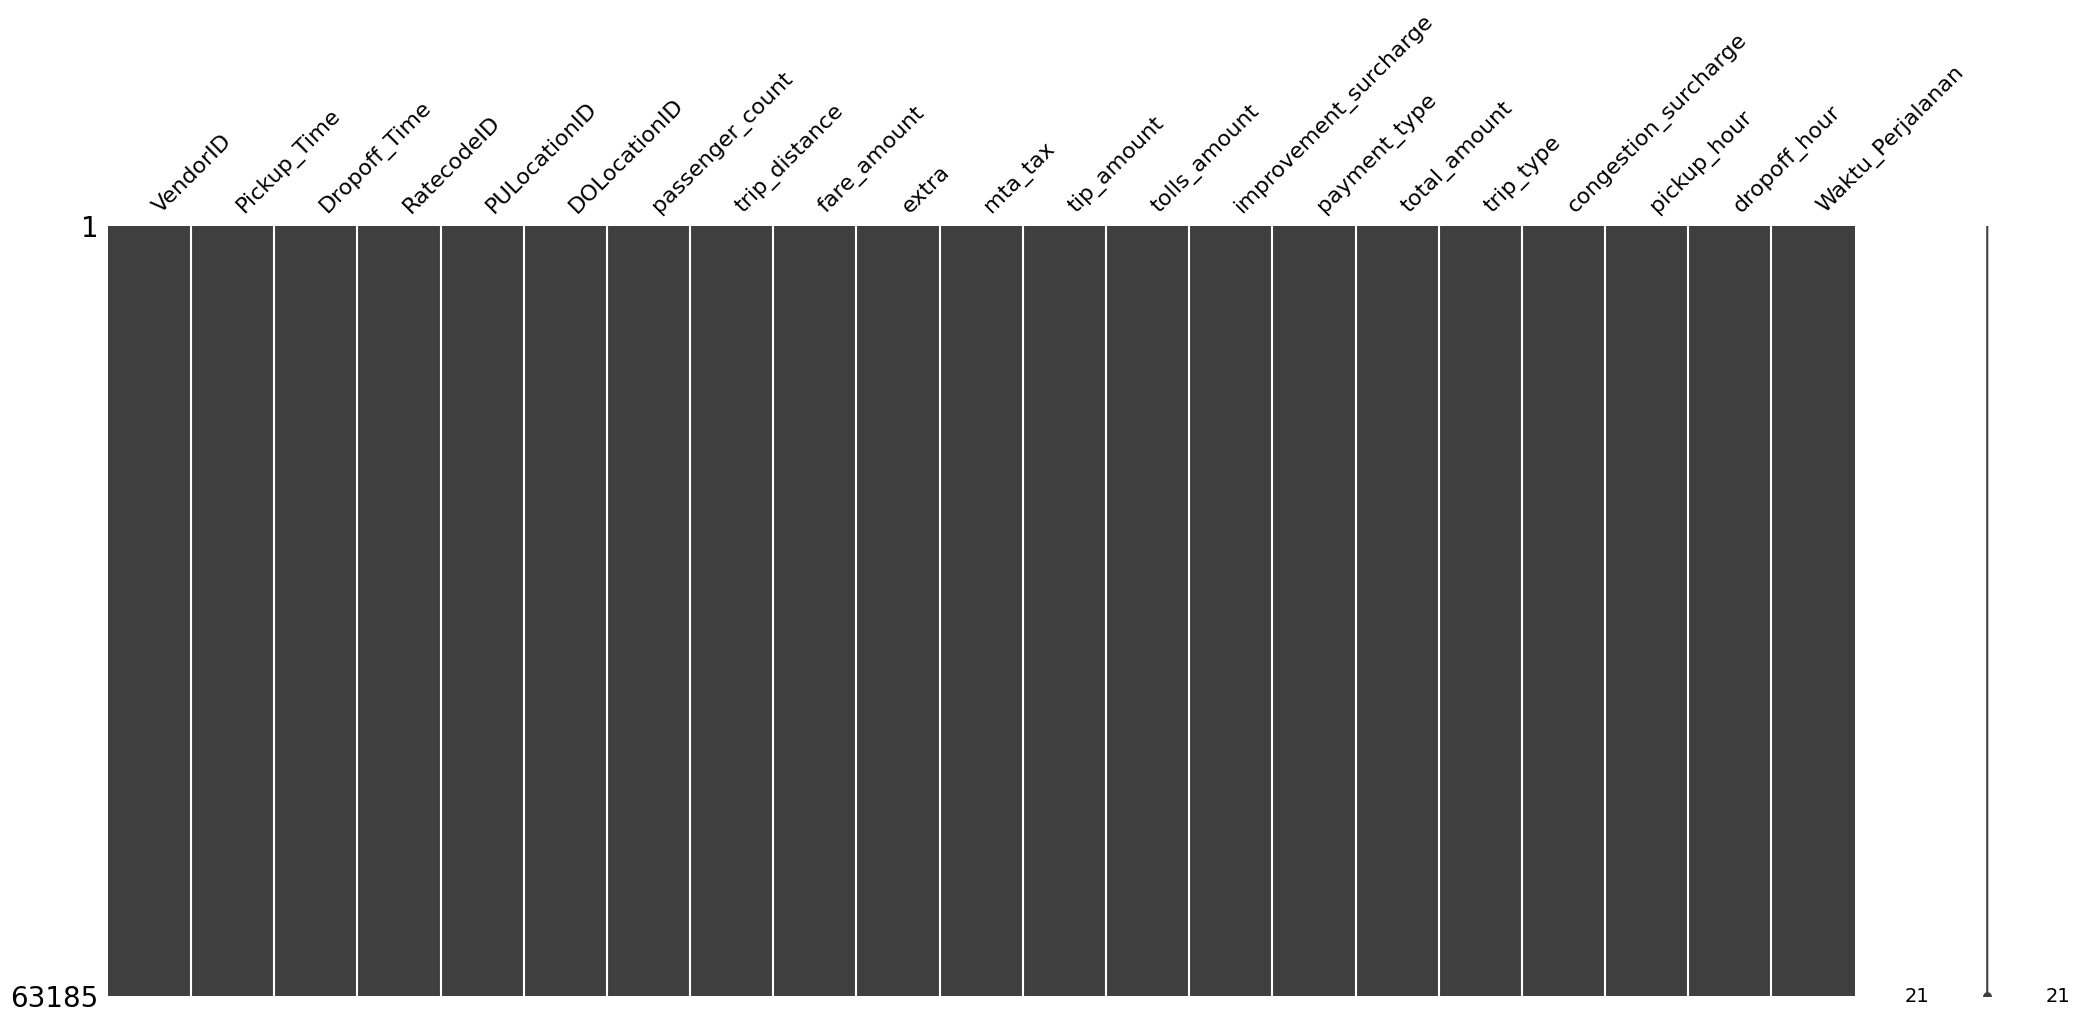

In [ ]:
msn.matrix(df)

Text(0.5, 0, '1=Credit card,2=Cash,3=No charge,4=Dispute,5=Unknown,6=Voided trip')

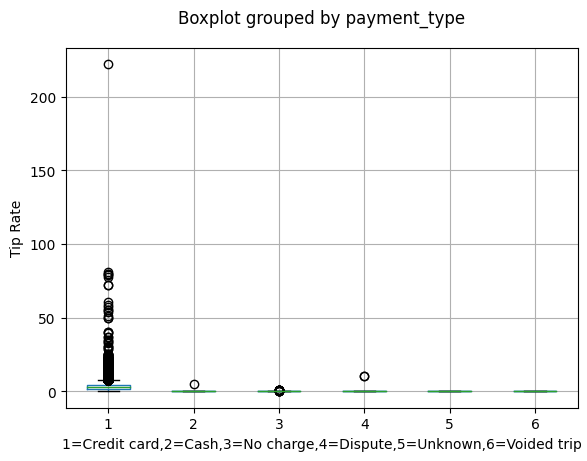

In [ ]:
## check the relationship between payment type and tip
ax = plt.subplot()
df.boxplot('tip_amount','payment_type', ax=ax)
ax.set_title('')
ax.set_ylabel('Tip Rate')
ax.set_xlabel('1=Credit card,2=Cash,3=No charge,4=Dispute,5=Unknown,6=Voided trip')

<Axes: xlabel='fare_amount'>

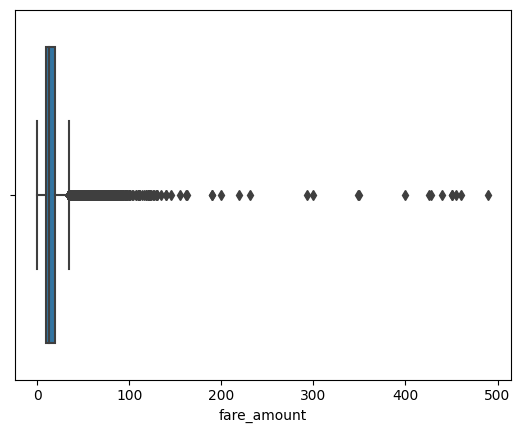

In [ ]:
sns.boxplot(
    data=df, 
    x="fare_amount"
)

<Axes: xlabel='trip_distance'>

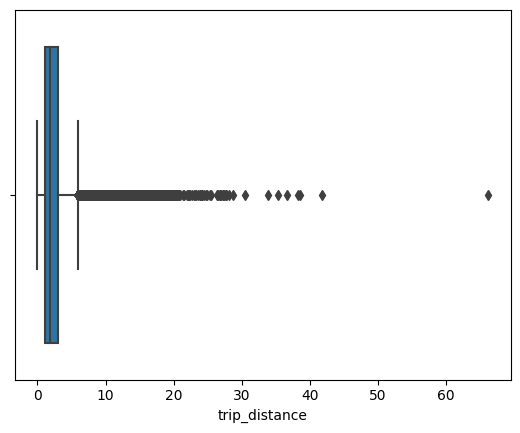

In [ ]:
sns.boxplot(
    data=df, 
    x="trip_distance"
)

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

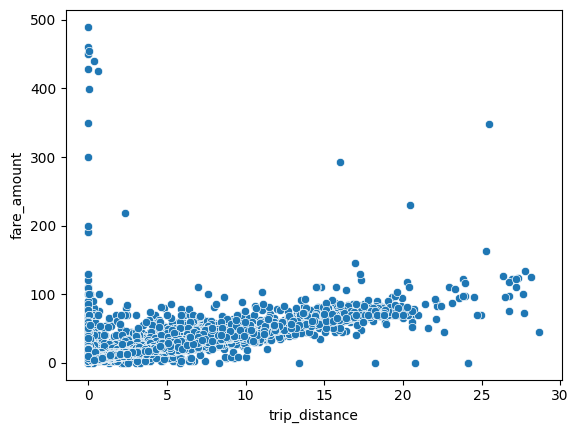

In [ ]:
sns.scatterplot(data = df[(df.fare_amount.between(0,499)) & (df.trip_distance.between(0,30))], x= 'trip_distance', y='fare_amount')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63185 entries, 0 to 63886
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               63185 non-null  int64          
 1   Pickup_Time            63185 non-null  datetime64[ns] 
 2   Dropoff_Time           63185 non-null  datetime64[ns] 
 3   RatecodeID             63185 non-null  Int64          
 4   PULocationID           63185 non-null  int64          
 5   DOLocationID           63185 non-null  int64          
 6   passenger_count        63185 non-null  Int64          
 7   trip_distance          63185 non-null  float64        
 8   fare_amount            63185 non-null  float64        
 9   extra                  63185 non-null  float64        
 10  mta_tax                63185 non-null  float64        
 11  tip_amount             63185 non-null  float64        
 12  tolls_amount           63185 non-null  float64     